# BIG MART SALES PREDICTION
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

<img src="https://datahack-prod.s3.amazonaws.com/profile_photos/final-grocery_480.png" />

## import important library : we will import other libraries when we need them
better way is to speculate what you will need and import exactly that thing for saving memory usage.

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
#import itertools

In [10]:
os.listdir()

['.ipynb_checkpoints',
 'BigMart Sales Prediction.ipynb',
 'bigmart-sales-data.zip',
 'correct.csv',
 'corr_submission.csv',
 'new data',
 'Submission.csv',
 'Test.csv',
 'Train.csv']

In [11]:
traindata= pd.read_csv("Train.csv")
testdata= pd.read_csv("Test.csv")

## DATA WRANGLING

In [12]:
traindata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [13]:
testdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


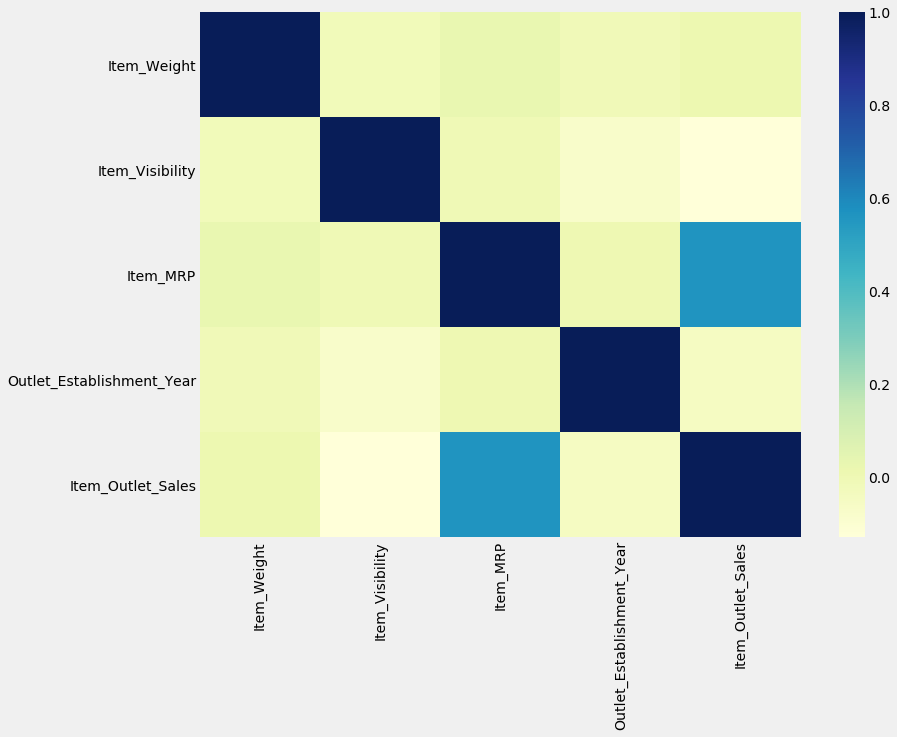

In [14]:
corr = traindata.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,cmap="YlGnBu")

In [15]:
print(traindata.info())
print('*'*20)
print(testdata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null 

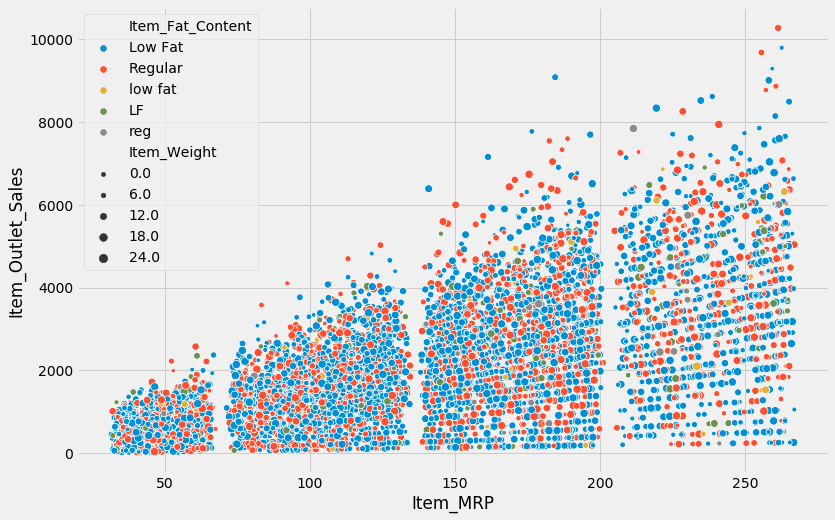

In [16]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=traindata)

In [17]:
traindatacol= ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type']
for i in traindatacol:
    print("print(traindata.{}.unique())".format(i))
    

    

print(traindata.Item_Identifier.unique())
print(traindata.Item_Weight.unique())
print(traindata.Item_Fat_Content.unique())
print(traindata.Item_Visibility.unique())
print(traindata.Item_Type.unique())
print(traindata.Item_MRP.unique())
print(traindata.Outlet_Identifier.unique())
print(traindata.Outlet_Establishment_Year.unique())
print(traindata.Outlet_Size.unique())
print(traindata.Outlet_Location_Type.unique())
print(traindata.Outlet_Type.unique())


In [18]:
traindata.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
print(traindata.Item_Identifier.unique())
print(traindata.Item_Weight.unique())
print(traindata.Item_Fat_Content.unique())
print(traindata.Item_Visibility.unique())
print(traindata.Item_Type.unique())
print(traindata.Item_MRP.unique())
print(traindata.Outlet_Identifier.unique())
print(traindata.Outlet_Establishment_Year.unique())
print(traindata.Outlet_Size.unique())
print(traindata.Outlet_Location_Type.unique())
print(traindata.Outlet_Type.unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.63   9.285  7.975 15.7    8.98

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016840102B38>,
      dtype=object)

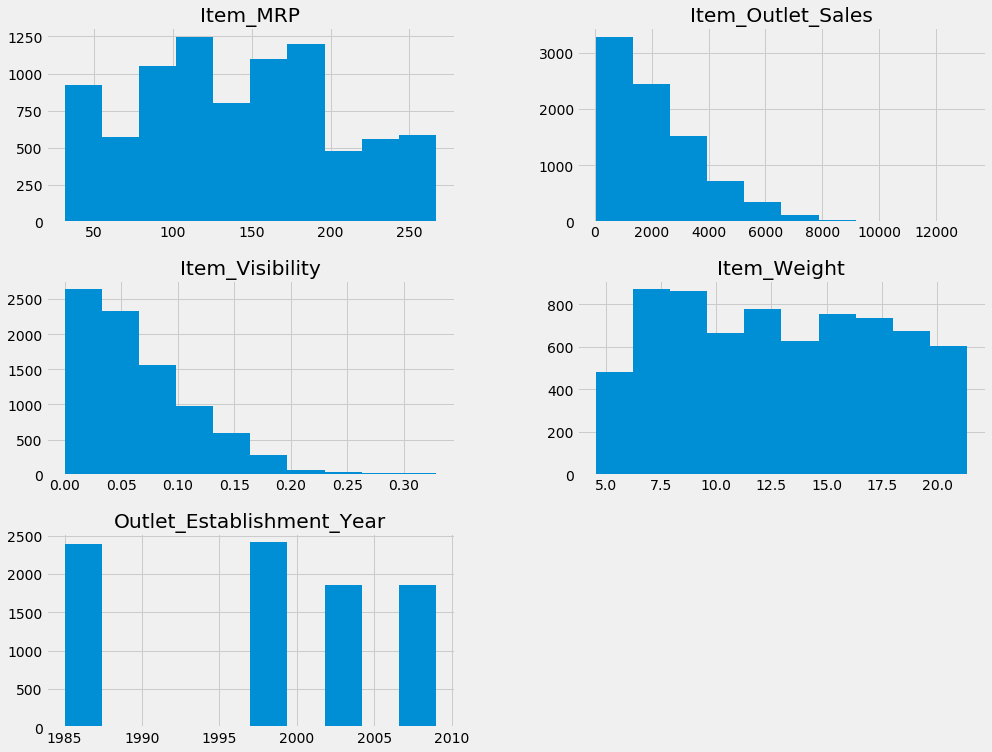

In [20]:
traindata.hist(figsize=(15,12))

In [21]:

traindatacol= ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type']
for i in traindatacol:
    print("traindata.{}.value_counts()".format(i))


traindata.Item_Identifier.value_counts()
traindata.Item_Weight.value_counts()
traindata.Item_Fat_Content.value_counts()
traindata.Item_Visibility.value_counts()
traindata.Item_Type.value_counts()
traindata.Item_MRP.value_counts()
traindata.Outlet_Identifier.value_counts()
traindata.Outlet_Establishment_Year.value_counts()
traindata.Outlet_Size.value_counts()
traindata.Outlet_Location_Type.value_counts()
traindata.Outlet_Type.value_counts()


In [22]:
hel = [traindata.Item_Identifier.value_counts(),
traindata.Item_Weight.value_counts(),
traindata.Item_Fat_Content.value_counts(),
traindata.Item_Visibility.value_counts(),
traindata.Item_Type.value_counts(),
traindata.Item_MRP.value_counts(),
traindata.Outlet_Identifier.value_counts(),
traindata.Outlet_Establishment_Year.value_counts(),
traindata.Outlet_Size.value_counts(),
traindata.Outlet_Location_Type.value_counts(),
traindata.Outlet_Type.value_counts()]
for i in range(11):
    print(hel[i])

FDG33    10
FDW13    10
DRN47     9
FDX20     9
NCI54     9
FDV38     9
FDV60     9
FDW26     9
FDX04     9
FDD38     9
NCY18     9
NCJ30     9
FDF56     9
NCQ06     9
NCF42     9
FDW49     9
FDP25     9
FDQ40     9
FDF52     9
FDX31     9
FDO19     9
DRE49     9
NCL31     9
FDG09     9
NCB18     9
FDU12     9
FDT07     9
FDZ26     8
FDX21     8
FDX58     8
         ..
NCW05     2
FDR57     2
FDT33     2
FDE39     2
FDF38     2
FDB10     2
NCW30     2
DRC24     2
FDI36     2
FDW10     2
NCX53     2
FDU43     2
FDP15     2
DRL59     2
FDG28     2
FDW58     2
FDZ50     2
DRE01     2
FDU09     2
FDM16     2
NCM42     2
DRF48     1
FDK57     1
FDE52     1
FDN52     1
FDQ60     1
FDO33     1
FDC23     1
FDT35     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
16.700    66
10.500    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
15.000    59
18.850    59
15.850    

In [23]:
traindata.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [24]:
testdata.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

## DATA CLEANING

In [25]:
traindata=traindata.drop(columns=['Item_Identifier','Item_Visibility'])

In [26]:
testdata=testdata.drop(columns=['Item_Identifier','Item_Visibility'])

In [27]:
traindata.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [28]:
testdata.Item_Weight.describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [29]:
traindata.loc[traindata.Item_Weight.isnull()]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,NaN,Low Fat,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,NaN,Low Fat,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,NaN,Regular,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,NaN,Low Fat,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,NaN,Regular,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,NaN,Regular,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,NaN,Regular,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,NaN,Low Fat,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,NaN,Regular,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,NaN,Low Fat,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [30]:
# we can remove Item_Weight due to low correlation but here is how we can fill nan values and use
traindata.Item_Weight.fillna(12.857645, inplace=True)
testdata.Item_Weight.fillna(12.695633, inplace=True)

In [31]:
traindata.Item_Weight.isnull().any()

False

In [32]:
traindata.loc[traindata.Outlet_Size.isnull()]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,16.200,Regular,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,13.000,Low Fat,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,5.925,Regular,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,19.250,Low Fat,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,17.850,Low Fat,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,6.420,LF,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,19.600,Low Fat,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,10.000,Low Fat,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [33]:
traindata.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [34]:
traindata.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

#### from upper cell, we can see the values for NaN in Outlet_Size

In [35]:
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Identifier=='OUT013'),'Outlet_Size']='High'
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Identifier=='OUT027'),'Outlet_Size']='Medium'
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Identifier=='OUT049'),'Outlet_Size']='Medium'
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Identifier=='OUT018'),'Outlet_Size']='Medium'

traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Identifier=='OUT035'),'Outlet_Size']='Small'
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Identifier=='OUT046'),'Outlet_Size']='Small'
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Identifier=='OUT019'),'Outlet_Size']='Small'

In [36]:
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Identifier=='OUT013'),'Outlet_Size']='High'
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Identifier=='OUT027'),'Outlet_Size']='Medium'
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Identifier=='OUT049'),'Outlet_Size']='Medium'
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Identifier=='OUT018'),'Outlet_Size']='Medium'

testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Identifier=='OUT035'),'Outlet_Size']='Small'
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Identifier=='OUT046'),'Outlet_Size']='Small'
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Identifier=='OUT019'),'Outlet_Size']='Small'

In [37]:
traindata.loc[traindata.Outlet_Size.isnull()]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,16.200,Regular,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,13.000,Low Fat,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,5.925,Regular,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,19.250,Low Fat,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,17.850,Low Fat,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,6.420,LF,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,19.600,Low Fat,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,10.000,Low Fat,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


#### grocery store are all small size in data

In [38]:
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Type=='Grocery Store'),'Outlet_Size']='Small'
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Type=='Grocery Store'),'Outlet_Size']='Small'

In [39]:
traindata.loc[traindata.Outlet_Size.isnull()]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,16.200,Regular,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,13.000,Low Fat,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,17.850,Low Fat,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,19.600,Low Fat,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,10.000,Low Fat,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
53,10.895,Low Fat,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
54,12.150,Low Fat,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
56,9.195,Low Fat,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440
61,7.970,Regular,Meat,87.3514,OUT045,2002,NaN,Tier 2,Supermarket Type1,1062.6168


#### we can see when Tier 2 & Supermarket Type1 are together then Outlet size is Small ,check   930 - previous data

In [40]:
traindata.loc[(traindata.Outlet_Size.isnull())&(traindata.Outlet_Type=='Supermarket Type1')&(traindata.Outlet_Location_Type=='Tier 2'),'Outlet_Size']='Small'
testdata.loc[(testdata.Outlet_Size.isnull())&(testdata.Outlet_Type=='Supermarket Type1')&(testdata.Outlet_Location_Type=='Tier 2'),'Outlet_Size']='Small'

In [41]:
traindata.loc[traindata.Outlet_Size.isnull()]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [42]:
traindata.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
testdata.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [44]:
traindata['Item_Fat_Content'].replace(['low fat','LF ','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
testdata['Item_Fat_Content'].replace(['low fat','LF ','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [45]:
traindata['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    3006
LF          316
Name: Item_Fat_Content, dtype: int64

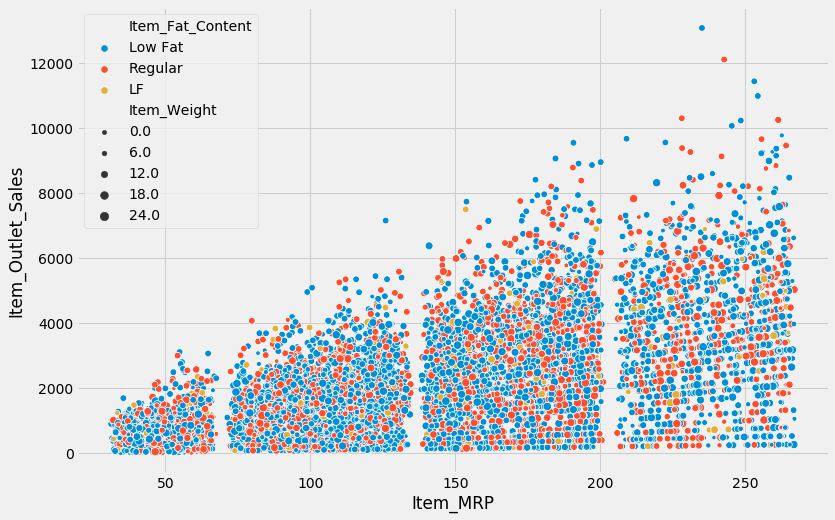

In [46]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=traindata)

In [47]:
traindata

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,Regular,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650000,Regular,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,12.857645,Low Fat,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200000,Regular,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,19.200000,Regular,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [48]:
testdata

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,14.600000,Low Fat,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,7.315000,Low Fat,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,12.695633,Regular,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,9.800000,Regular,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,19.350000,Regular,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,12.695633,Low Fat,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,6.305000,Regular,Snack Foods,95.7436,OUT045,2002,Small,Tier 2,Supermarket Type1
9,5.985000,Low Fat,Baking Goods,186.8924,OUT017,2007,Small,Tier 2,Supermarket Type1


In [49]:
Y_train=traindata.pop('Item_Outlet_Sales')


In [50]:
traindata

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.920000,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.500000,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.200000,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store
4,8.930000,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,10.395000,Regular,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
6,13.650000,Regular,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1
7,12.857645,Low Fat,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,16.200000,Regular,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1
9,19.200000,Regular,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1


In [51]:
Y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [52]:
traindata.Outlet_Establishment_Year= traindata.Outlet_Establishment_Year.astype(object)

In [53]:

testdata.Outlet_Establishment_Year= testdata.Outlet_Establishment_Year.astype(object) 

## ONE HOT ENCODING 

In [54]:
traindata= pd.get_dummies(traindata)

In [55]:
testdata= pd.get_dummies(testdata)

In [56]:
traindata.head()

,Item_Weight,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,249.8092,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,48.2692,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,141.6180,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,182.0950,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,53.8614,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [57]:
testdata.head()

,Item_Weight,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,107.8622,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,87.3198,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,14.600000,241.7538,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,7.315000,155.0340,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,12.695633,234.2300,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [58]:
X_train=traindata

# Train Test Split : for checking RMSE 

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
Y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     858.8820
8517    36

In [61]:
x_train1, x_test1, y_train1, y_test1 = train_test_split( X_train, Y_train, test_size=0.09, random_state=42)

In [62]:
x_test1.shape

(768, 50)

In [63]:
y_train1

7539    7017.5320
7365     595.2252
3651    2763.0700
2922    7142.7024
744     2924.8594
8437    2596.6200
3989    3197.1716
8017     765.6700
1732    3779.0808
7214     517.3266
3379     727.0536
1918     746.3618
2484    1042.6428
604     2812.3392
2002    2693.8268
1962     425.4462
6100    2259.0594
5402    1390.1904
4204    2396.8800
3182    1142.5128
7170    1166.4816
5456    1018.0082
3334    1017.3424
2029    1347.5792
4076    2450.1440
2574    2607.2728
3649    5681.2714
3518    4202.5296
532       95.8752
2348    3455.5020
          ...    
1899    1198.4400
4658     543.2928
3005    2679.8450
2734    4848.3556
189     2233.0932
2747     261.6594
2047     645.1602
7849     567.2616
2558     585.9040
6396    4287.7520
3385    3962.8416
4555    2476.7760
1184    1713.7692
6420    6056.1168
5051    2946.1650
5311    1959.4494
2433    1374.2112
6949    1116.5466
769     3006.0870
1685    2055.3246
8322    3271.7412
5578     506.0080
4426    1105.8938
466     1940.8070
6265    15

### Checking if both of train and test data are of similar dimension

In [64]:
x_train1

,Item_Weight,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7539,12.857645,227.2720,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7365,14.600000,196.9084,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3651,9.500000,110.3228,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2922,12.857645,199.6084,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
744,20.350000,127.6678,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
8437,13.650000,100.0700,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3989,7.905000,230.2694,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8017,10.100000,76.3670,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1732,15.600000,173.2764,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
7214,12.857645,172.0422,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [65]:
Y_test= testdata

In [66]:
Y_test

,Item_Weight,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,107.8622,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,87.3198,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,14.600000,241.7538,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,7.315000,155.0340,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,12.695633,234.2300,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
5,9.800000,117.1492,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6,19.350000,50.1034,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7,12.695633,81.0592,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,6.305000,95.7436,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
9,5.985000,186.8924,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


## Predictive Modeling (Using API)

### importing all of Algoriths that we want to use
#### Linear_model: 
<font color=blue> Lasso, Ridge 
    
#### Neighbors:
<font color=red> KNeighborsRegressor
<font color=black>
    
    
#### Tree:
<font color=blue> DecisionTreeRegressor
<font color=black>
    
#### Neural network:
<font color=red> MLPRegressor 
<font color=black>
    
#### Ensemble:
<font color=black> GradientBoostingRegressor

name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','SGD Regression','SGD Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost','Ada Boost CV',
     'Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [68]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor   
from sklearn.ensemble import  GradientBoostingRegressor

## LOOP FOR FITTING AND PREDICTING USING ALL MODEL (API) 

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
import warnings
warnings.filterwarnings('ignore')model= [LinearRegression(), DecisionTreeRegressor() ,   Lasso(), Ridge(),  MLPRegressor(), GradientBoostingRegressor()  ]
name = ['LinearRegression','DecisionTreeRegressor','Lasso','Ridge','MLPRegressor','GradientBoostingRegressor']
SCORE= []
TESTING=[]
RSME=[]
for ku in model:
    #ku will be replaced with each model like as first one is LogisticRegression()
    algorithm = ku.fit(x_train1,y_train1)
    print(ku)
    #now 'algorithm' will be fitted by API with above line and next line will check score with data training and testing
    predict_ku=ku.predict(x_test1)
    print('RSME: {:.4f}'.format(np.sqrt(mean_squared_error(y_test1,predict_ku))))
    score=cross_val_score(ku,x_train1,y_train1,cv=10,scoring='neg_mean_squared_error')
    ku_score_cross=np.sqrt(-score)
    
    print('mean: {:.2f} and std:{:.2f}'.format(np.mean(ku_score_cross),np.std(ku_score_cross)))
    print('---'*10)
    print('training set accuracy: {:.2f}'.format(algorithm.score(x_train1,y_train1)))
    print('test set accuracy: {:.2f}'.format(algorithm.score(x_test1,y_test1)))
    print('---'*30)
    #Now we are making a dataframe where by each loop the dataframe is added by SCORE,TESTING
    RSME.append(np.sqrt(mean_squared_error(y_test1,predict_ku)))
    SCORE.append(algorithm.score(x_train1,y_train1))
    TESTING.append(algorithm.score(x_test1,y_test1))
models_dataframe=pd.DataFrame({'training score':SCORE,'testing score':TESTING,'RSME':RSME},index=name)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
RSME: 1072.6147
mean: 1136.35 and std:47.05
------------------------------
training set accuracy: 0.56
test set accuracy: 0.57
------------------------------------------------------------------------------------------
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RSME: 1558.7924
mean: 1577.65 and std:56.21
------------------------------
training set accuracy: 1.00
test set accuracy: 0.10
------------------------------------------------------------------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', t

#### MODEL COMPARISON
SEEING IN ASCENDING ORDER FOR EASIER COMPARISON

In [71]:
models_dataframe

,training score,testing score,RSME
LinearRegression,0.562540,0.573810,1072.614650
DecisionTreeRegressor,0.999952,0.099897,1558.792428
Lasso,0.562399,0.574264,1072.043752
Ridge,0.562539,0.573821,1072.601111
MLPRegressor,0.578309,0.590797,1051.021518
GradientBoostingRegressor,0.630654,0.613101,1021.976530


In [72]:
asendingtraining = models_dataframe.sort_values(by='RSME', ascending=False)
asendingtraining 

,training score,testing score,RSME
DecisionTreeRegressor,0.999952,0.099897,1558.792428
LinearRegression,0.562540,0.573810,1072.614650
Ridge,0.562539,0.573821,1072.601111
Lasso,0.562399,0.574264,1072.043752
MLPRegressor,0.578309,0.590797,1051.021518
GradientBoostingRegressor,0.630654,0.613101,1021.976530


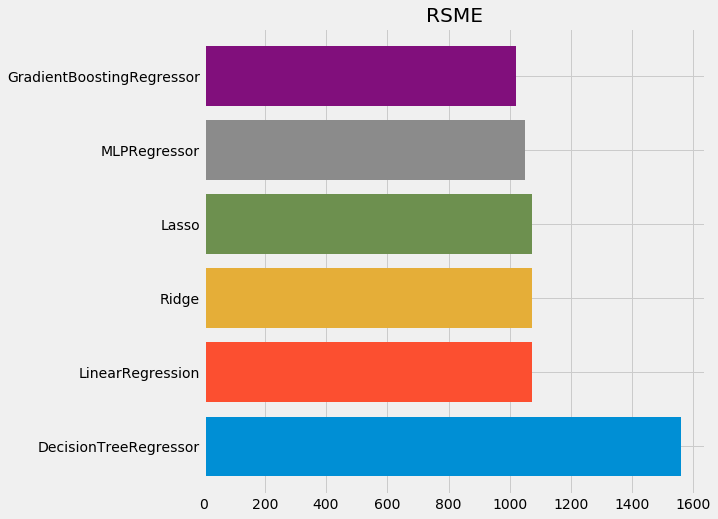

In [73]:
asendingtraining['RSME'].plot.barh(width=0.8)
plt.title('RSME')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

# Submission

In [74]:
model = GradientBoostingRegressor()
model.fit(X_train,Y_train)
prediction=model.predict(Y_test)

In [75]:
sample=pd.read_csv('Submission.csv')

In [76]:
del sample['Item_Outlet_Sales']

In [77]:
df=pd.DataFrame({'Item_Outlet_Sales':prediction})
corr_ans=pd.concat([sample,df],axis=1)
del corr_ans['Unnamed: 0']
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1515.175292
1,FDW14,OUT017,1391.174461
2,NCN55,OUT010,601.163787
3,FDQ58,OUT017,2514.797937
4,FDY38,OUT027,6021.197387
5,FDH56,OUT046,1893.487890
6,FDL48,OUT018,561.227435
7,FDC48,OUT027,2188.041426
8,FDN33,OUT045,1500.457142
9,FDA36,OUT017,3151.741825


In [78]:
corr_ans.to_csv('correct.csv',index=None)

In [79]:
corr_ans.to_csv('C:\\Users\\ernag\\Desktop\\ML Projects\BigMart Sales Prediction\corr_submission.csv',index=False)

thanks for help:https://www.kaggle.com/littleraj30/big-mart-sale-prediction-in-depth-ensemble